In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sakshi2k/Social_Network_Ads/refs/heads/master/Social_Network_Ads.csv')

In [4]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [11]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Using UnScaled Input Features


In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.6455 - loss: 2166.8716 - val_accuracy: 0.4000 - val_loss: 663.5825
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3412 - loss: 754.0517 - val_accuracy: 0.6000 - val_loss: 507.9124
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6744 - loss: 387.7607 - val_accuracy: 0.4000 - val_loss: 342.2807
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4752 - loss: 254.4710 - val_accuracy: 0.6000 - val_loss: 418.1281
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5805 - loss: 227.7420 - val_accuracy: 0.6000 - val_loss: 112.8105
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5863 - loss: 97.0367 - val_accuracy: 0.6000 - val_loss: 171.6009
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5971 - loss: 117.0467 - val_accuracy: 0.6000 - val_loss: 125.5813
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6603 - loss: 113

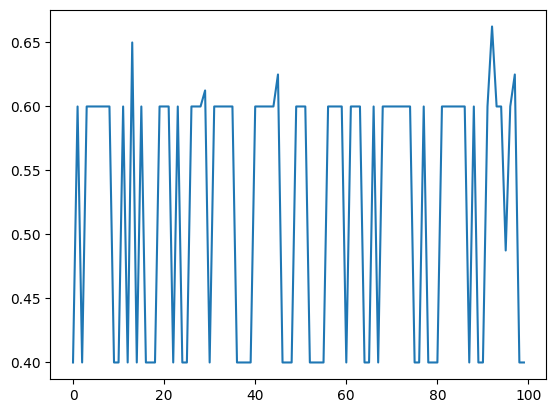

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])



```
val_accuracy is oscillating because NN is trained on unscaled data and its failing to converge. thats why we got such a poor accuracy score.
```



## Using Scaled Input Features

In [15]:
history2 = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.6248 - loss: 0.6547 - val_accuracy: 0.6375 - val_loss: 0.5668
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7469 - loss: 0.5127 - val_accuracy: 0.7625 - val_loss: 0.4639
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8305 - loss: 0.4066 - val_accuracy: 0.8000 - val_loss: 0.3962
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8426 - loss: 0.3615 - val_accuracy: 0.7875 - val_loss: 0.3676
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8361 - loss: 0.3461 - val_accuracy: 0.8000 - val_loss: 0.3473
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8736 - loss: 0.3233 - val_accuracy: 0.8125 - val_loss: 0.3476
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8828 - loss: 0.2977 - val_accuracy: 0.8250 - val_loss: 0.3396
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8912 - loss: 0.2799 - val_accuracy: 0.8250 

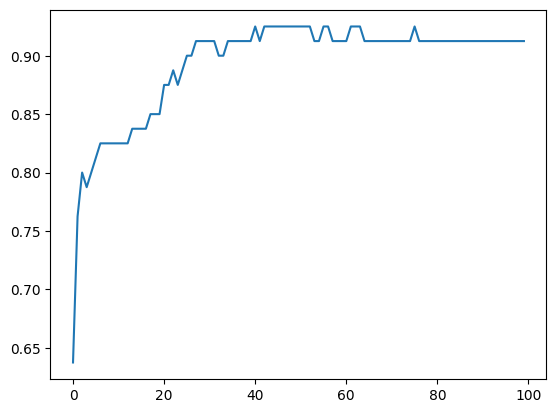

In [16]:
plt.plot(history2.history['val_accuracy'])



```
Scaled data converges better than non-scaled data. Therfore we got a better accuracy score when used scaled features.
```

